In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
print((tf.__version__))

2.2.0


# Dataset PreProcessing



In [3]:
text_data = pd.read_csv("Reviews.csv",nrows=100000) #We will use the dataset of Amazon Fine food Reviews

In [4]:
text_data.shape

(100000, 10)

In [5]:
text_data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               4
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64

In [6]:
text_data = text_data.dropna() #remove Missing values
text_data.drop_duplicates(subset=['Text'],inplace=True)#dropping duplicayes

In [7]:
#Removing unwanted features

text_data = text_data.dropna()
text_data = text_data.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator',
                        'Score','Time'], 1)
text_data = text_data.reset_index(drop=True)

In [8]:
text_data.head()

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
for i in range(5):
    print("Review #",i+1)
    print(text_data.Summary[i])
    print(text_data.Text[i])
    print()

Review # 1
Good Quality Dog Food
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Review # 2
Not as Advertised
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

Review # 3
"Delight" says it all
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces 

In [10]:
from bs4 import BeautifulSoup

In [11]:
#now we must remove the unwanted characters using regular expressions(re) and remove the stop words 
#We must replace the contractions with it's full words 

import re
from nltk.corpus import stopwords
import nltk
import html

In [12]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [13]:
stop_words = set(stopwords.words('english')) 

def text_processing(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [14]:
#cleaning the Dataset text and summaries and save the updated reviews in clean_text and clean_summaries list
            
clean_summaries = []
for summary in text_data.Summary:
    clean_summaries.append(text_processing(summary,1))

clean_texts = []
for text in text_data.Text:
    clean_texts.append(text_processing(text,0))
    

/home/dishank/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:389: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [15]:
max_summary_length = 8
max_text_length = 30

In [16]:
for i in range(5):
    print("Clean Review #",i+1)
    print(clean_summaries[i])
    print(clean_texts[i])
    print()

Clean Review # 1
good quality dog food
bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better

Clean Review # 2
not as advertised
product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo

Clean Review # 3
delight says it all
confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch

Clean Review # 4
cough medicine
looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal

Clean Review # 5
great taffy
great taffy great price wide assortment yummy taffy delivery quick taffy lover deal



In [17]:
print(clean_summaries[:5])

['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


In [18]:
text_data['clean_texts']=clean_texts
text_data['clean_summaries']=clean_summaries

In [19]:
text_data.replace('', np.nan, inplace=True)
text_data.dropna(axis=0,inplace=True)

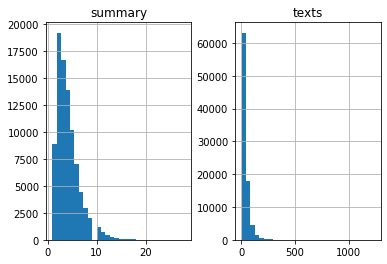

In [20]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in text_data['clean_texts']:
      text_word_count.append(len(i.split()))

for i in text_data['clean_summaries']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'texts':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

# Creation Of The Vocabulary and Tokenization


In [21]:
cnt=0
for i in text_data['clean_summaries']:
    if(len(i.split())<=8):
        cnt=cnt+1
print(cnt/len(text_data['clean_summaries']))

0.9424907471335922


In [22]:
clean_texts =np.array(text_data['clean_texts'])
clean_summaries=np.array(text_data['clean_summaries'])

short_text=[]
short_summary=[]

for i in range(len(clean_texts)):
    if(len(clean_summaries[i].split())<=max_summary_length and len(clean_texts[i].split())<=max_text_length):
        short_text.append(clean_texts[i])
        short_summary.append(clean_summaries[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

# WORD EMBEDDINGS

In [23]:
en_shape=np.shape(short_text[0])
de_shape=np.shape(short_summary[0])

here we find that only 5.35% of words are missing in CN embedding vector which is much better then th GloVe vector

# Inspection of Text and Summaries and Handling  Unknown Words

In [24]:
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [25]:
 #we put <SOS> and <EOS> text before and at the end of each summary

df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
import tensorflow.keras.backend as tk
tk.clear_session()

<h1>TOKENIZATION</h1>

In [28]:
#x-text y-sum tr-train val-value
from sklearn.model_selection import train_test_split

sum_train,sum_value,text_train,text_value=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True)

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

<h3>For Text</h3>

In [30]:
#This may take some time
text_tokenizer = Tokenizer() 
text_tokenizer.fit_on_texts(list(sum_train))

<h4>Handling Rare Words</h4>

In [31]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

In [32]:
for key,value in text_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 66.12339930151339
Total Coverage of rare words: 2.953684513790566


In [33]:
#prepare a tokenizer for reviews on training data
text_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
text_tokenizer.fit_on_texts(list(text_train))

#convert text sequences into integer sequences
text_train_seq    = text_tokenizer.texts_to_sequences(text_train) 
text_value_seq   =   text_tokenizer.texts_to_sequences(text_value)

#padding zero upto maximum length
text_train    =   pad_sequences(text_train_seq,  maxlen=max_text_length, padding='post')
text_value   =   pad_sequences(text_value_seq, maxlen=max_text_length, padding='post')

#size of vocabulary ( +1 for padding token)
text_vocab   =  text_tokenizer.num_words + 1
print(text_vocab)

8440


<h3>For Summary</h3>

In [34]:
#prepare a tokenizer for reviews on training data
sum_tokenizer = Tokenizer()   
sum_tokenizer.fit_on_texts(list(sum_train))

In [35]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in sum_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 73.0400224800289
Total Coverage of rare words: 3.943610061734083


In [36]:
#prepare a tokenizer for reviews on training data
sum_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
sum_tokenizer.fit_on_texts(list(sum_train))

#convert text sequences into integer sequences
sum_train_seq    =   sum_tokenizer.texts_to_sequences(sum_train) 
sum_value_seq   =   sum_tokenizer.texts_to_sequences(sum_value) 

#padding zero upto maximum length
sum_train    =   pad_sequences(sum_train_seq, maxlen=max_summary_length, padding='post')
sum_value   =   pad_sequences(sum_value_seq, maxlen=max_summary_length, padding='post')

#size of vocabulary
summary_vocab  =   sum_tokenizer.num_words +1

In [37]:
print(summary_vocab)

6717


In [38]:
#Remove words that contain start and end tag only

ind=[]
for i in range(len(sum_train)):
    cnt=0
    for j in sum_train[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

sum_train=np.delete(sum_train,ind, axis=0)
text_train=np.delete(text_train,ind, axis=0)

# Buliding The Modal

For encoder : Bidirectional LSTM Will be used <br>
Decoder : Bidirectional LSTM Blocks Will be used<br>
For Better Precision <b>Bahadanu Attention Modal</b> is used for better performance of long text<br>
At Decoding Layer Beam Search is used as Inference<br>

In [39]:
#pip install tensorflow_addons

In [40]:
import tensorflow_addons as tfa
import tensorflow.compat.v1 as tf
from tensorflow.python.layers.core import Dense
from tensorflow.python.ops.rnn_cell_impl import _zero_state_tensors
import os
import time

In [41]:
#Tensorflow Placeholders


def placeholder_input():
    '''Create palceholders for inputs to the model'''
    
    input_data = tf.placeholder(tf.int32, [None, None], name='input')
    targets = tf.placeholder(tf.int32, [None, None], name='targets')
    lr = tf.placeholder(tf.float32, name='learning_rate')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    summary_length = tf.placeholder(tf.int32, (None,), name='summary_length')
    max_summary_length = tf.reduce_max(summary_length, name='max_dec_len')
    text_length = tf.placeholder(tf.int32, (None,), name='text_length')

    return input_data, targets, lr, keep_prob, summary_length, max_summary_length, text_length

In [42]:
#hyperparameters
num_layers = 2

In [43]:
def lstm_block(lstm_size, keep_prob):
        """Creates LSTM block
        """
        cell = tf.nn.rnn_cell.LSTMCell(lstm_size ,  initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
        cell = tf.nn.rnn_cell.DropoutWrapper(cell, input_keep_prob=keep_prob)
        return cell

In [44]:
#We need to do sentence padding so that each sentence of a batch entering encoder is of same length
def sentence_padding(batch_text):

    max_sentence = max([len(sentence) for sentence in batch_text])
    batch_value =  [sentence + [vocab_en['<PAD>']] * (max_sentence - len(sentence)) 
                    for sentence in sentence_batch]
    return batch_value

In [45]:
def get_batches(summaries, texts, batch_size):
    """Batch summaries, texts, and the lengths of their sentences together"""
    for batch_i in range(0, len(texts)//batch_size):
        start_i = batch_i * batch_size
        summaries_batch = summaries[start_i:start_i + batch_size]
        texts_batch = texts[start_i:start_i + batch_size]
        pad_summaries_batch = np.array(pad_sentence_batch(summaries_batch))
        pad_texts_batch = np.array(pad_sentence_batch(texts_batch))
        
        # Need the lengths for the _lengths parameters
        pad_summaries_lengths = []
        for summary in pad_summaries_batch:
            pad_summaries_lengths.append(len(summary))
        
        pad_texts_lengths = []
        for text in pad_texts_batch:
            pad_texts_lengths.append(len(text))
        
        yield pad_summaries_batch, pad_texts_batch, pad_summaries_lengths, pad_texts_lengths

<h3>Creation Of bidirectional LSTM Encoder</h3><br>

In [46]:
def dropout(x,rate,training):
    return tf.cond(tf_train,
                    lambda: tf.nn.dropout(x,rate=0.3),
                    lambda: x)


In [47]:
#embd_text = tf.nn.embedding_lookup(tf_embd, tf_text)

#embd_text = dropout(embd_text,rate=0.3,training=tf_train)

In [48]:
#S = tf.shape(embd_text)[1] #text sequence length
#N = tf.shape(embd_text)[0] #batch_size

In [49]:
#Before going to the decoder the text coming from Encoder is processed
def process_encoding_input(target_data, vocab_en, batch_size):
    '''Remove the last word id from each batch and concat the <GO> to the begining of each batch'''
    
    ending = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    decoder_input = tf.concat([tf.fill([batch_size, 1], vocab_en['<GO>']), ending], 1)

    return decoder_input

In [50]:
def encoder(lstm_size, sequence_length,encoder_layers, lstm_inputs, keep_prob):
    
    for layer in range(num_layers):
        with tf.variable_scope('encoder_{}'.format(layer)):

            #Defining the forwaard and Backward cell for Bidirectional RNN
            fw_cell = lstm_block(lstm_size // 2,keep_prob)
            bw_cell = lstm_block(lstm_size // 2,  keep_prob) 
    
    
            encoder_output, encoder_state = tf.nn.bidirectional_dynamic_rnn(fw_cell, 
                                                                    bw_cell, 
                                                                    lstm_inputs,
                                                                    sequence_length,
                                                                    dtype=tf.float32)
    # Join outputs since we are using a bidirectional RNN
    encoder_output = tf.concat(encoder_output,2)
    
    return encoder_output, encoder_state

<h3>Creation of Bidirectional Decoder</h3>

In [51]:
def training_decoder(glove_embeddings,dec_embed_input, summary_length, decoder_cell, initial_state, output_layer, 
                            vocab_size, max_summary_length):

    eos_id = tf.cast(vocab_en[eos], tf.int32)
    
    training_sampler = tfa.seq2seq.ScheduledEmbeddingTrainingSampler(
                    sampling_probability=0.5,
                    time_major=False)
    
    #Basic decoder
    training_decoder = tfa.seq2seq.BasicDecoder(decoder_cell,
                                                       training_sampler,
                                                       output_layer) 
    
    t_logits,_ ,_ = tfa.seq2seq.dynamic_decode(training_decoder,
                                  output_time_major=False,
                                  impute_finished=True,
                                  maximum_iterations=max_summary_length)

    
    return training_decoder
    
    

In [52]:
def attention_modal(encoder_output , decoder_cell , lstm_size , text_lengths,alignment_history = False):
    
    #context
        attention_context = tfa.seq2seq.BahdanauAttention(num_units=lstm_size,
                                                                   memory=encoder_output,
                                                                   memory_sequence_length=text_lengths,
                                                                   name='BahdanauAttention')
        
#target
        att_cell = tfa.seq2seq.AttentionWrapper(cell=decoder_cell,
                                                   attention_mechanism=attention_context,
                                                   attention_layer_size=None,
                                                   output_attention=False,
                                                   alignment_history=alignment_history)
        
        return att_cell
   

In [53]:
def beam_Search(word_embeddings,start_token ,end_tokens, decoder_cell, initial_state, 
                output_layer,max_summary_length,batch_size):
    
        start_tokens = tf.tile(tf.constant([start_token], dtype=tf.int32), [batch_size], name='start_tokens')
    
        inference_helper = tfa.seq2seq.GreedyEmbeddingSampler(
                                                                )
                
        inference_decoder = tfa.seq2seq.BasicDecoder(decoder_cell,
                                                        inference_helper,
                                                        initial_state,
                                                        output_layer)
                
        inference_logits, _ , _ = tfa.seq2seq.dynamic_decode(inference_decoder,
                                                            output_time_major=False,
                                                            impute_finished=True,
                                                            maximum_iterations=max_summary_length)
        return greedy_decoder
                            

In [54]:
def decoder(dec_embed_input, glove_embeddings, encoder_output, encoder_state, vocab_size, text_length, 
            summary_length,max_summary_length, lstm_size, vocab_en, keep_prob, batch_size, num_layers):
    
    
    #Define Start and end Tokens
    start_token =  vocab_en['<GO>']
    start_tokens= start_tokens = tf.tile(tf.constant([start_token], dtype=tf.int32), [batch_size], name='start_tokens')
    end_token =  vocab_en['<EOS>']
    
    
    for layer in range(num_layers):
        with tf.variable_scope(format(layer)):
            lstm = tf.nn.rnn_cell.LSTMCell(lstm_size,
                                           initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            decoder_cell = tf.nn.rnn_cell.DropoutWrapper(lstm, 
                                                             input_keep_prob = keep_prob)
    
    output_layer = Dense(vocab_size,
                         kernel_initializer = tf.truncated_normal_initializer(mean = 0.0, stddev=0.1))
    
    
    #Attention Mechanism
    #decoder_output = attention_modal(encoder_output , decoder_cell , lstm_size , text_length)
    attn_mech = tfa.seq2seq.BahdanauAttention(lstm_size,
                                                  encoder_output,
                                                  text_length,
                                                  normalize=False,
                                                  name='BahdanauAttention')
    
    decoder_cell = tfa.seq2seq.AttentionWrapper(decoder_cell,
                                                          attn_mech,
                                                          lstm_size,alignment_history = False,output_attention = True,)
    
    
                                                                                       
      #Initial State of decoder will be the same as encoder_state[0]  
    initial_state = decoder_cell.get_initial_state(inputs = None,batch_size=batch_size,dtype=tf.float32).clone(cell_state=encoder_state[0])

    
    #Training decoder Layer
    with tf.variable_scope("decode"):
        
        #Basic Decoding
        trained_decoder =     training_decoder(glove_embeddings,dec_embed_input,  
                                                  summary_length, 
                                                  decoder_cell, 
                                                  initial_state,
                                                  output_layer,
                                                  vocab_size, 
                                                  max_summary_length)
        
        
        #Dynamic Decoding
        training_logits,_ ,_ = tfa.seq2seq.dynamic_decode(decoder = trained_decoder,
                            maximum_iterations = max_summary_length,
                            swap_memory = True,
                            scope = None,
                            decoder_init_input= glove_embeddings,
                            decoder_init_kwargs= {
                                'initial_state' : initial_state,
                                'start_tokens': start_tokens, 'end_token': end_token
                            })
        
    with tf.variable_scope("decode", reuse=True):
        inference_decoder =           beam_Search(glove_embeddings,  
                                                    start_token, 
                                                    end_token,
                                                    decoder_cell, 
                                                    initial_state, 
                                                    output_layer,
                                                    max_summary_length,
                                                    batch_size)
        #Dynamic Decoding for inference
        inference_logits,_ ,_ = tfa.seq2seq.dynamic_decode(inference_decoder,
                                  output_time_major=False,
                                  impute_finished=True,
                                  maximum_iterations=max_summary_length,parallel_iterations = 32)

    return training_logits, inference_logits

<h3>Buliding Sequence to sequence Modal with encoder decoder architecture </h3><br>

# Execution Of Modal

In [55]:
latent_dim = 100

In [56]:
import tensorflow.keras.backend as tk
tk.clear_session()

In [57]:
en_shape=np.shape(short_text[0])
de_shape=np.shape(short_summary[0])


<h3> Encoder Execution</h3>

In [58]:
embedding_dim = 100  
 # Encoder
batch_size = 50
num_classes = 1
epochs = 20
learning_rate = 0.005
clip_norm = 2.0
encoder_inputs = Input(shape=(max_text_length,))

In [59]:
#embedding layer
enc_embed_input =  Embedding(text_vocab, embedding_dim,trainable=True)(encoder_inputs)

In [60]:
#encoder lstm layer 1
encoder_lstm_layer1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,
                     recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm_layer1(enc_embed_input)

In [61]:
#encoder lstm layer 2
encoder_lstm_layer2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm_layer2(encoder_output1)

In [62]:
#encoder lstm layer 3
encoder_lstm_layer3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm_layer3(encoder_output2)

<h3>Decoder Execution</h3>

In [63]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_embed_layer = Embedding(summary_vocab, embedding_dim,trainable=True)
dec_embed = dec_embed_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences = True, return_state = True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_embed, initial_state = [state_h, state_c])

In [64]:
from tensorflow.keras.layers import Dense,LSTM,Input,Activation,Add,TimeDistributed,\
Permute,Flatten,RepeatVector,Lambda,Multiply,Reshape

In [65]:
decoder_outputs1 = tf.transpose(
    decoder_outputs)
encoder_outputs1 = tf.transpose(
    encoder_outputs)
print(encoder_outputs.shape)
print(decoder_outputs.shape)

print(encoder_outputs1.shape)
print(decoder_outputs1.shape)

(None, 30, 100)
(None, None, 100)
(100, 30, None)
(100, None, None)


<h3>Attention Modal</h3><br>

In [66]:
# Query-value attention of shape [batch_size, Tq, filters].
attention = TimeDistributed(Dense(1, activation = 'tanh'))(encoder_outputs)
attention = Flatten()(attention)
print(attention.shape)
attention = Multiply()([decoder_outputs1,attention])
attention = Activation('softmax')(attention)
   

(None, 30)


In [67]:
#context_vector, attention_weights = Attention(encoder_outputs,decoder_outputs)
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention))

Attention weights shape: (batch_size, sequence_length, 1) Tensor("activation/Identity:0", shape=(100, None, 30), dtype=float32)


In [69]:
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attention])

#dense layer
decoder_dense =  TimeDistributed(Dense(summary_vocab, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 100)      844000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 30, 100), (N 80400       embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [70]:
print(decoder_outputs.shape)
#model.fit( train_data_X, train_data_Y_, epochs=20, validation_split=0.2, batch_size=600, shuffle=True, verbose=1)

(None, None, 6717)


In [71]:
#Concatnation of Attention input with decoder output in another block

#decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, 
                                                                 # attn_result])

<h3>Modal Evaluation</h3><br>

In [195]:
#dense layer and final output is passed through softmax activation
#decoder_dense =  TimeDistributed(Dense(summary_vocab, activation='softmax'))
#decoder_outputs = decoder_dense(decoder_concat_input)


In [196]:
#Sparse Categorial Crossentropy is used for calculating loss 
#reference : https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy

model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [197]:
#Modal will stop execute if detects negative loss

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

<h1>TRAINING THE MODAL</h1><br>

In [198]:
history=model.fit([text_train,sum_train[:,:-1]],
                  sum_train.reshape(sum_train.shape[0],sum_train.shape[1], 1)[:,1:] ,
                  epochs=10,callbacks=[es],batch_size=128,
                  validation_data=([text_value,sum_value[:,:-1]], 
                sum_value.reshape(sum_value.shape[0],sum_value.shape[1], 1)[:,1:]))

Epoch 1/10


ValueError: in user code:

    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/merge.py:183 call
        return self._merge_function(inputs)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/merge.py:522 _merge_function
        return K.concatenate(inputs, axis=self.axis)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:2709 concatenate
        return array_ops.concat([to_dense(x) for x in tensors], axis)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:180 wrapper
        return target(*args, **kwargs)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:1606 concat
        return gen_array_ops.concat_v2(values=values, axis=axis, name=name)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py:1189 concat_v2
        "ConcatV2", values=values, axis=axis, name=name)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3327 _create_op_internal
        op_def=op_def)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1817 __init__
        control_input_ops, op_def)
    /home/dishank/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimension 1 in both shapes must be equal, but are 7 and 30. Shapes are [?,7] and [?,30]. for '{{node model_4/concat_layer/concat}} = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32](model_4/lstm_8/StatefulPartitionedCall:1, model_4/additive_attention_12/MatMul, model_4/concat_layer/concat/axis)' with input shapes: [?,7,100], [?,30,100], [] and with computed input tensors: input[2] = <2>.


NEw MDoal 2

In [ ]:
class Seq2SeqSummarizer(object):

    model_name = 'seq2seq'

    def __init__(self, config):
        self.num_input_tokens = config['num_input_tokens']
        self.max_input_seq_length = config['max_input_seq_length']
        self.num_target_tokens = config['num_target_tokens']
        self.max_target_seq_length = config['max_target_seq_length']
        self.input_word2idx = config['input_word2idx']
        self.input_idx2word = config['input_idx2word']
        self.target_word2idx = config['target_word2idx']
        self.target_idx2word = config['target_idx2word']
        self.config = config

        self.version = 0
        if 'version' in config:
            self.version = config['version']

        encoder_inputs = Input(shape=(None,), name='encoder_inputs')
        encoder_embedding = Embedding(input_dim=self.num_input_tokens, output_dim=HIDDEN_UNITS,
                                      input_length=self.max_input_seq_length, name='encoder_embedding')
        encoder_lstm = LSTM(units=HIDDEN_UNITS, return_state=True, name='encoder_lstm')
        encoder_outputs, encoder_state_h, encoder_state_c = encoder_lstm(encoder_embedding(encoder_inputs))
        encoder_states = [encoder_state_h, encoder_state_c]

        decoder_inputs = Input(shape=(None, self.num_target_tokens), name='decoder_inputs')
        decoder_lstm = LSTM(units=HIDDEN_UNITS, return_state=True, return_sequences=True, name='decoder_lstm')
        decoder_outputs, decoder_state_h, decoder_state_c = decoder_lstm(decoder_inputs,
                                                                         initial_state=encoder_states)
        decoder_dense = Dense(units=self.num_target_tokens, activation='softmax', name='decoder_dense')
        decoder_outputs = decoder_dense(decoder_outputs)

        model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

        model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

        self.model = model

        self.encoder_model = Model(encoder_inputs, encoder_states)

        decoder_state_inputs = [Input(shape=(HIDDEN_UNITS,)), Input(shape=(HIDDEN_UNITS,))]
        decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_state_inputs)
        decoder_states = [state_h, state_c]
        decoder_outputs = decoder_dense(decoder_outputs)
        self.decoder_model = Model([decoder_inputs] + decoder_state_inputs, [decoder_outputs] + decoder_states)